In [1]:
# import libery 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\CHETAN\OneDrive\Desktop\insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


no null present in data 

sex, smoker, region is object datatype 

In [5]:
for i in df:
    x = df[i].value_counts()
    print(x)

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
male      676
female    662
Name: sex, dtype: int64
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
       

check another proof of null and check unique value 

no null value present in all feature 

bmi and age is numrical data and remaining is catgorical data 

In [6]:
# import labelencoder for object data convert to intiger data 
from sklearn.preprocessing import LabelEncoder

In [7]:
enc = LabelEncoder()

In [8]:
# use labelEncoder in rigion, sex and smoker feature to convert object to int data  
df['region'] = enc.fit_transform(df['region'])
df['sex'] = enc.fit_transform(df['sex'])
df['smoker'] = enc.fit_transform(df['smoker'])

In [9]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [10]:
df['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [11]:
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [12]:
# use statastic method describe to data 
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


1) age , smoker, sex, children , region is catgorical column 

2) bmi and target variable charges is numrical column

3) bmi feature have outlier 

4) age column is look normal distribution data 

In [13]:
df.shape

(1338, 7)

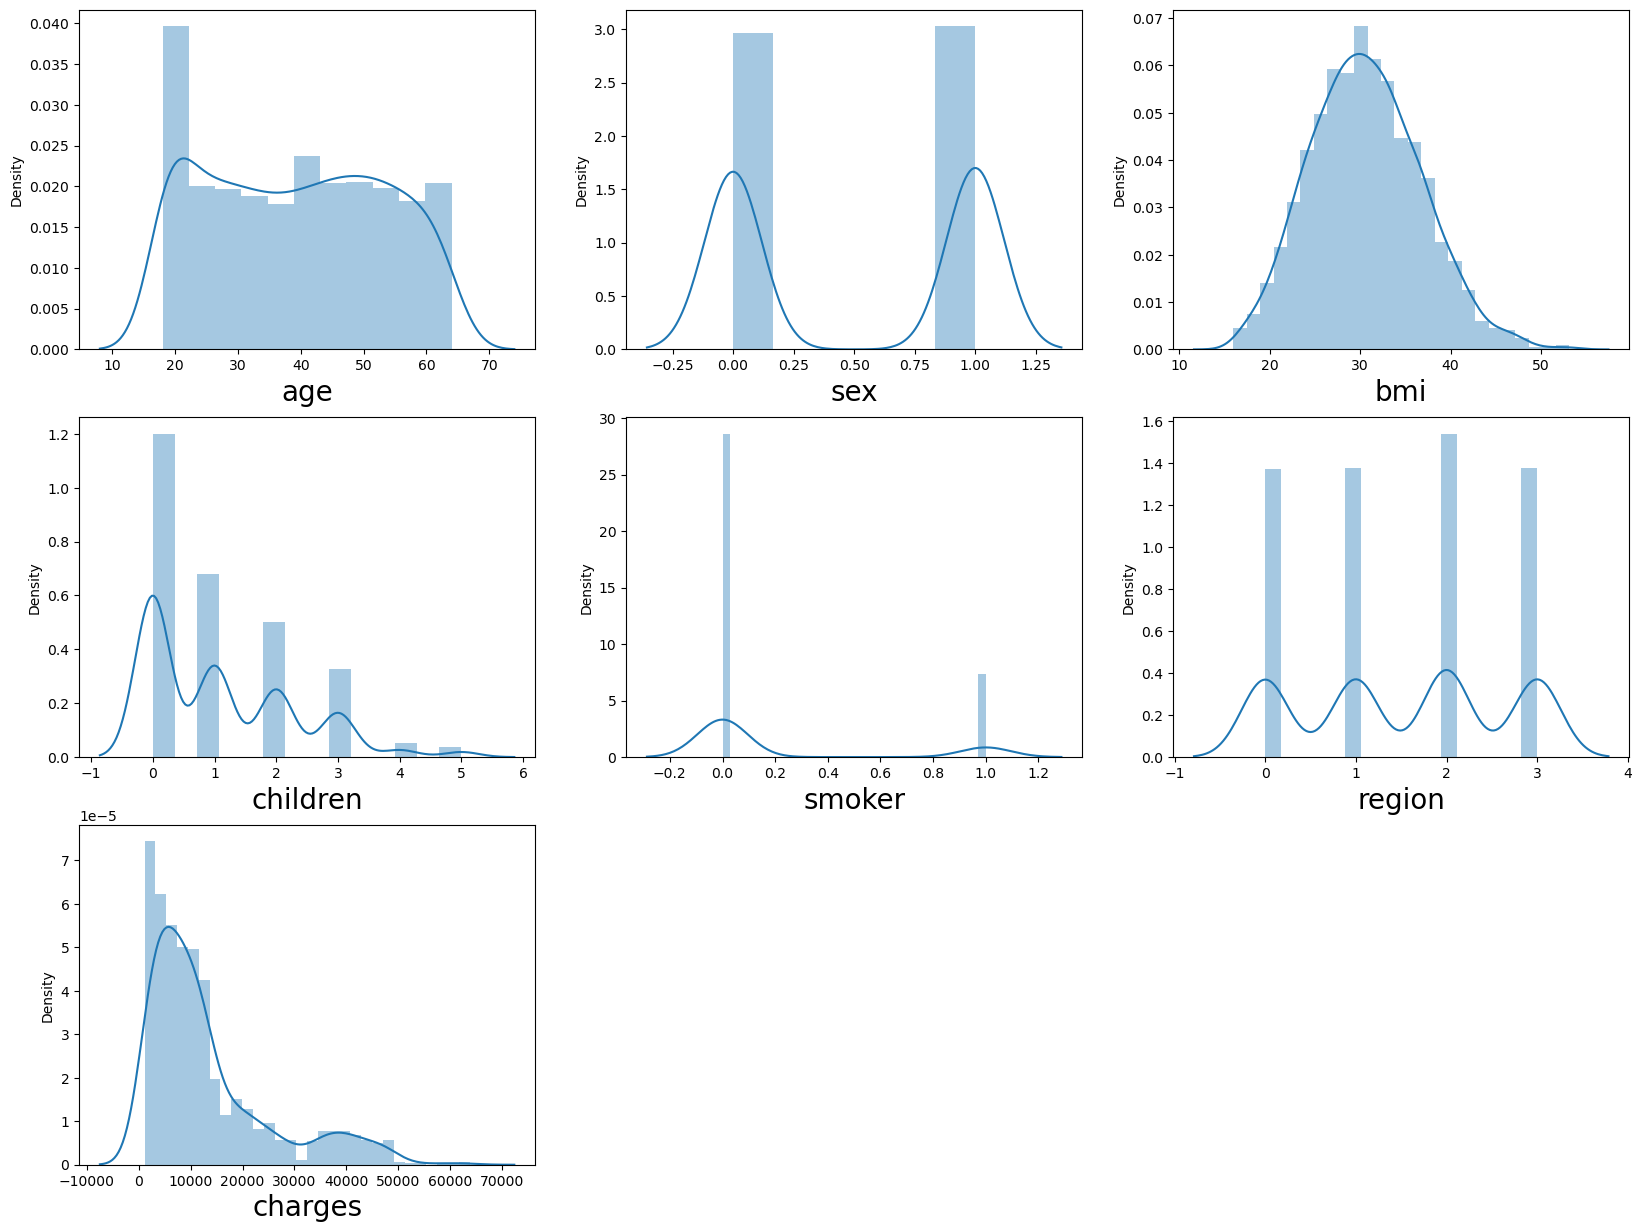

In [14]:
# plot distribution plot to check how data is distributed
plt.figure(figsize=(20,15))
plotnumber = 1

for i in df:
    if plotnumber<=7:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()    

all feature is normal distributed 

bmi feature is outlier

In [15]:
# seprate numrical feature in new variable for check outlier using boxplot
numrical_data = df[['age','bmi']]

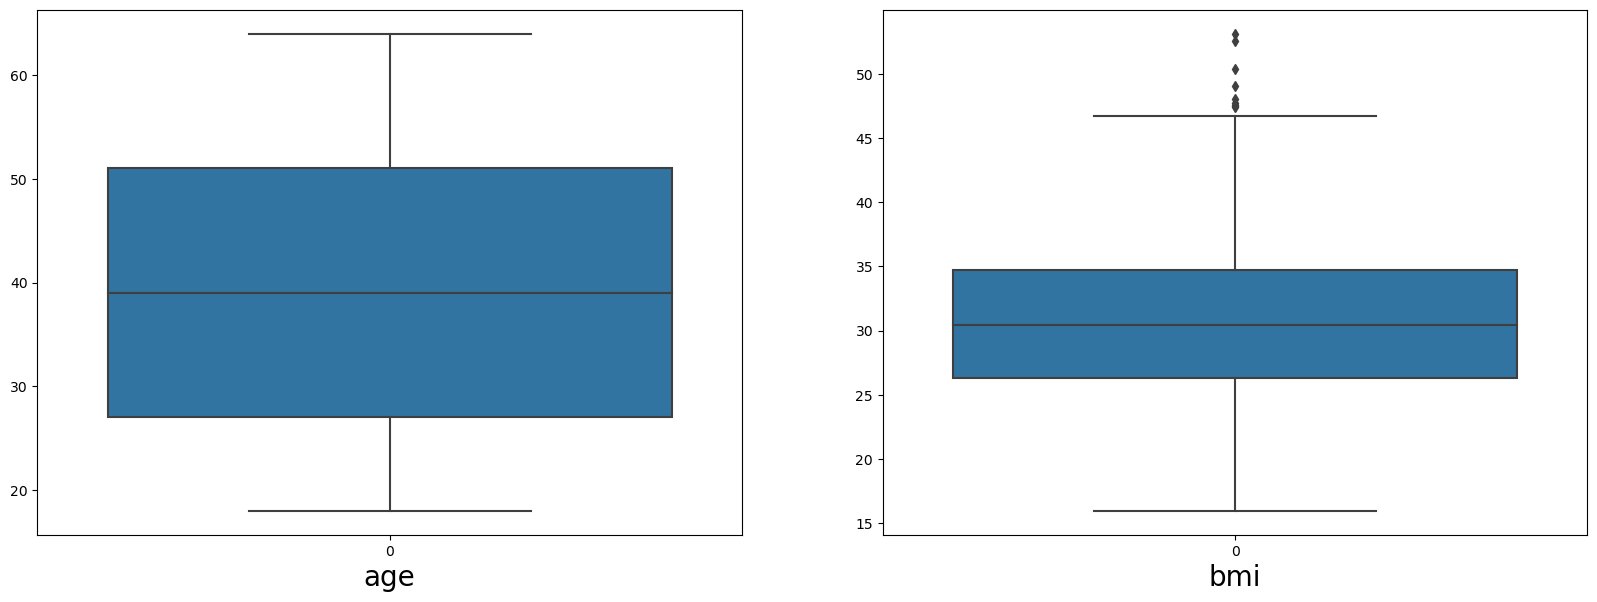

In [16]:
# used boxplot age and bmi feature to check outlier 
plt.figure(figsize=(20,15))
plotnumber = 1

for i in numrical_data:
    if plotnumber<=2:
        plt.subplot(2,2,plotnumber)
        sns.boxplot(numrical_data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show() 

bmi feature some higher outlier present .. 

delect this outlier using IQR mehtod 

In [17]:
iqr = df['bmi'].quantile(0.75) - df['bmi'].quantile(0.25)
x = df['bmi'].quantile(0.75) + (1.5 * iqr)
index = np.where(df['bmi']>x)
df = df.drop(df.index[index])
df.reset_index()


,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,3,16884.92400
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,1,21984.47061
4,4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...,...
1324,1333,50,1,30.970,3,0,1,10600.54830
1325,1334,18,0,31.920,0,0,0,2205.98080
1326,1335,18,0,36.850,0,0,2,1629.83350
1327,1336,21,0,25.800,0,0,3,2007.94500


In [18]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.203913,0.504138,30.537348,1.096313,0.203913,1.513168,13212.333374
std,14.047835,0.500171,5.919946,1.207928,0.403057,1.106532,11997.236429
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4738.268200
50%,39.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9361.326800
75%,51.000000,1.000000,34.485000,2.000000,0.000000,2.000000,16586.497710
max,64.000000,1.000000,46.750000,5.000000,1.000000,3.000000,62592.873090


delete higher oullier using Q3 + (1.5 * IQR ) formula 

In [19]:
# seprate feature and label 
x = df.drop('charges',axis=1)
y = df['charges']

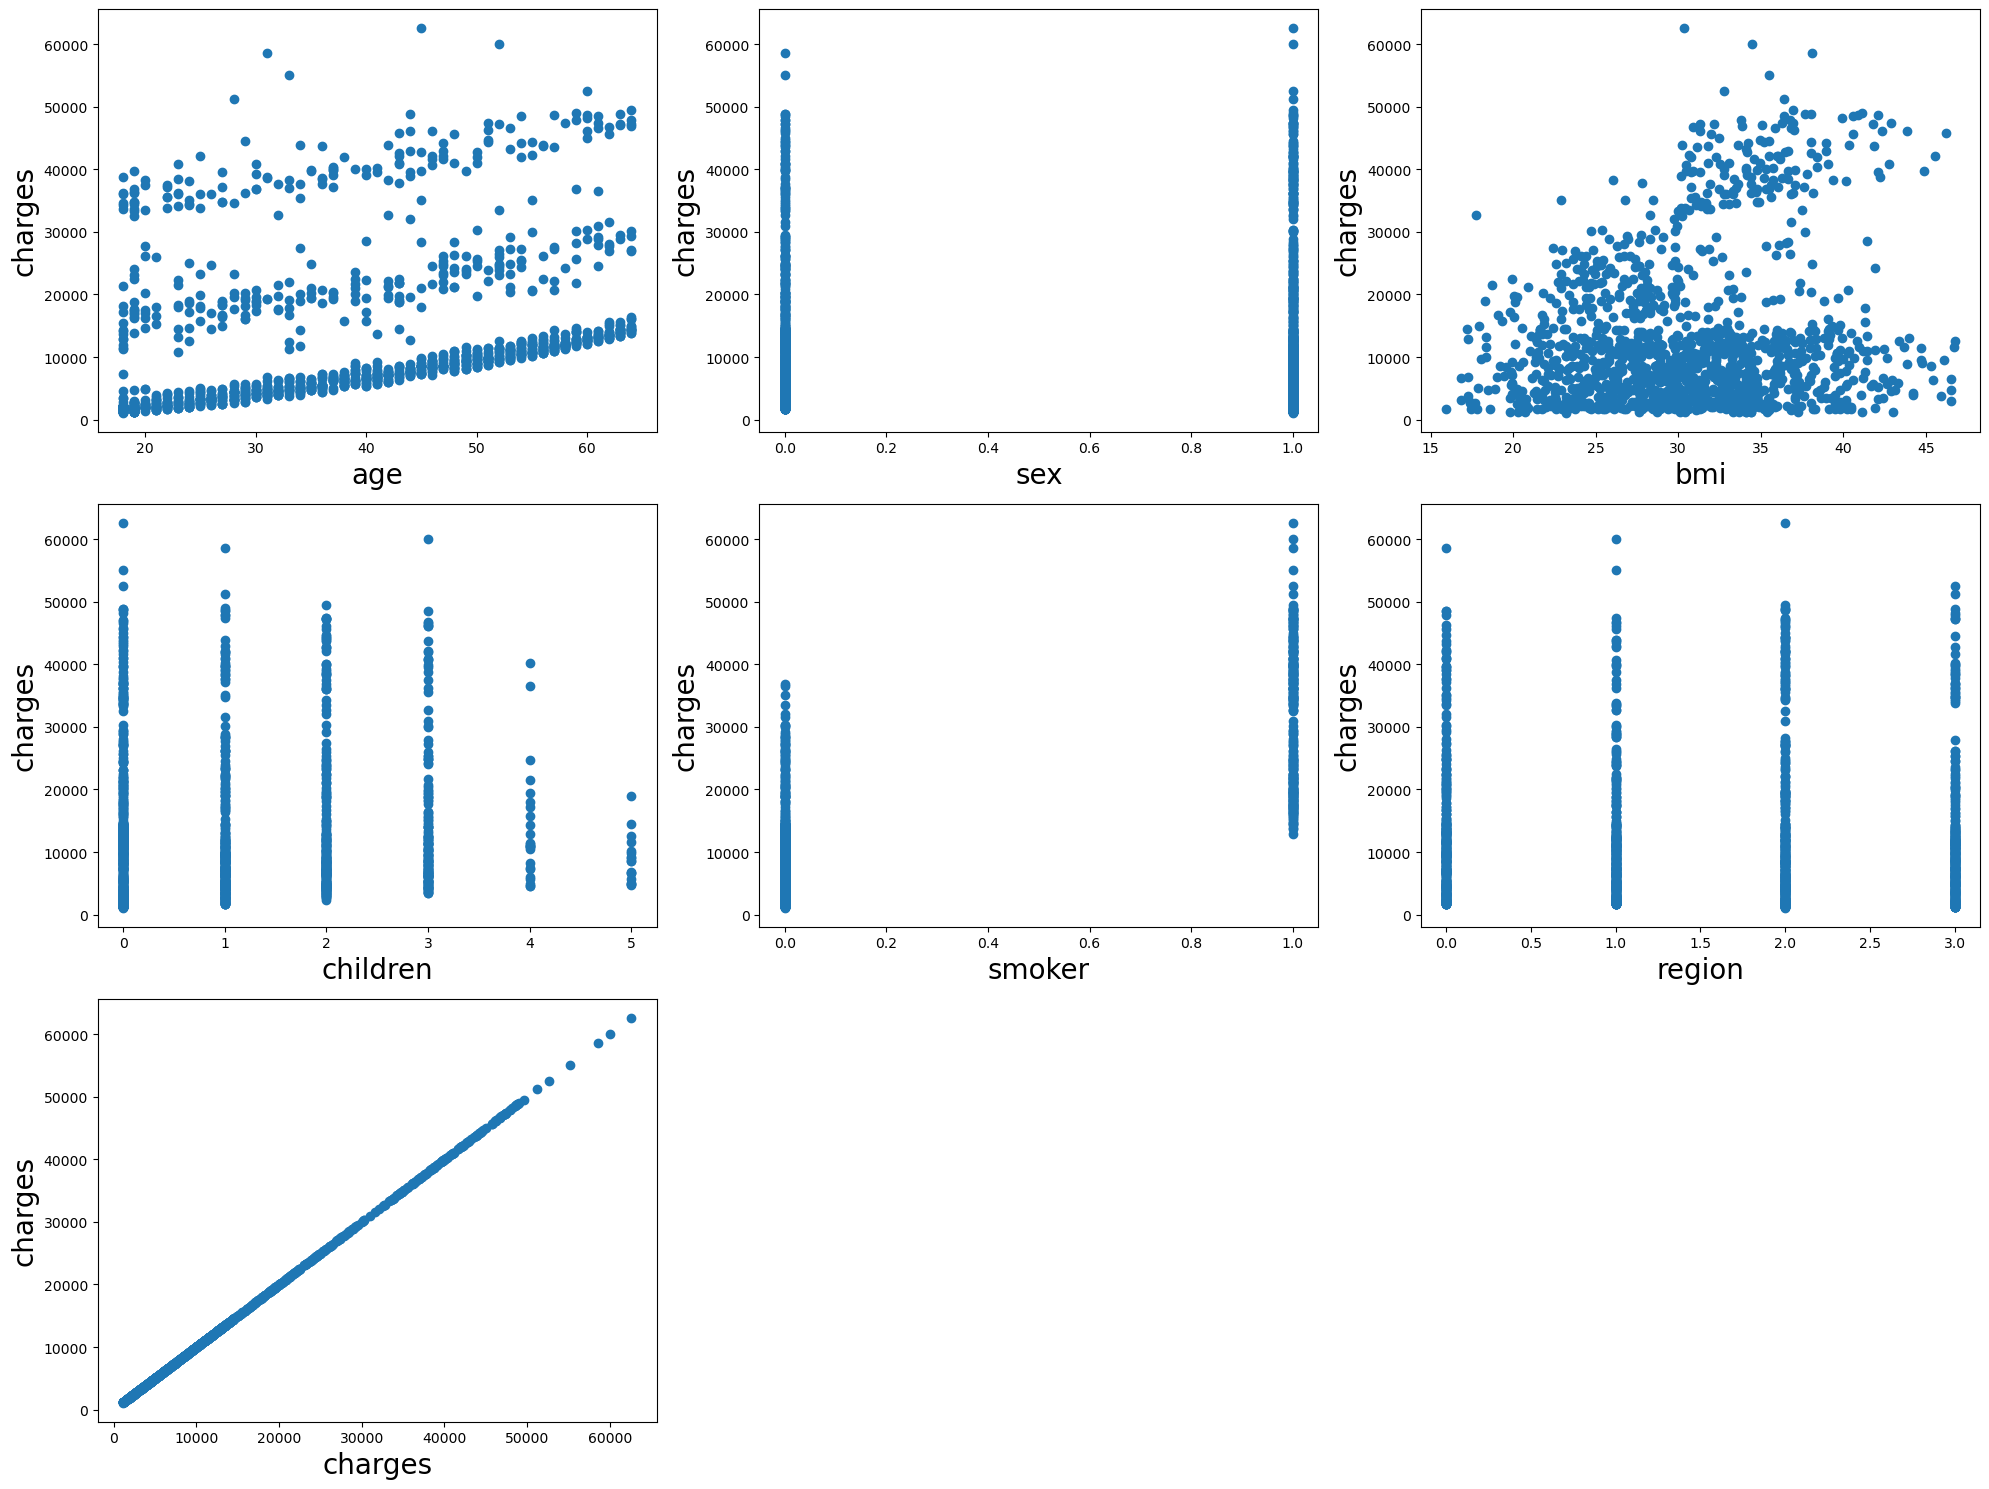

In [20]:
# check feature vs label relation using scatter plot
plt.figure(figsize=(20,15))
plotnumber = 1

for i in df:
    if plotnumber<=7:
        plt.subplot(3,3,plotnumber)
        plt.scatter(df[i],y)
        plt.xlabel(i,fontsize=20)
        plt.ylabel('charges',fontsize=20)
    plotnumber+=1
plt.tight_layout()  

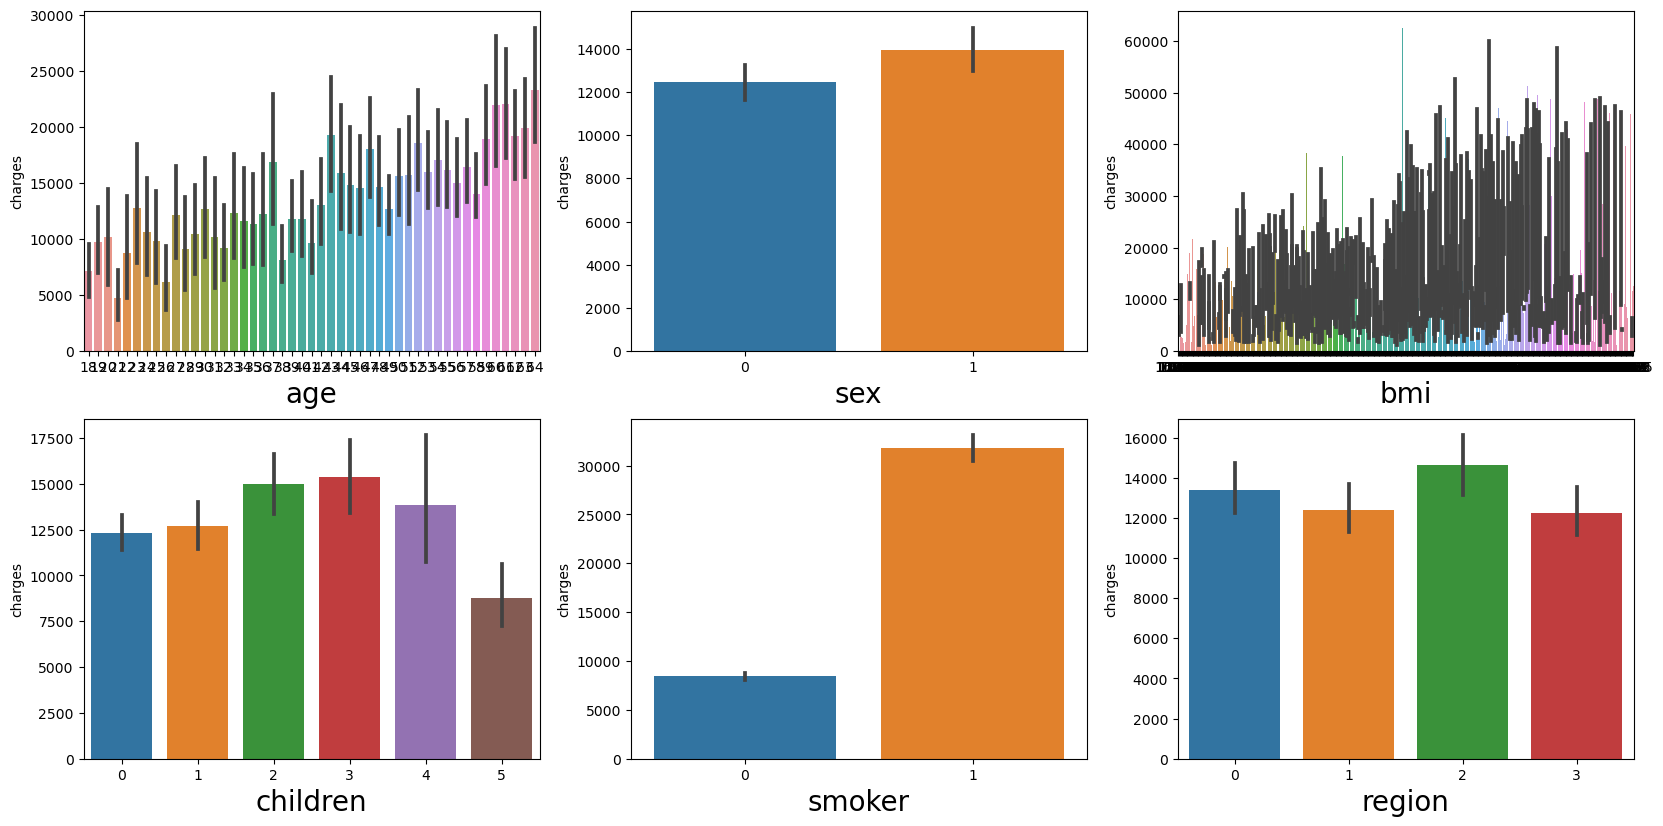

In [21]:
# check feature and label using bar plot 
plt.figure(figsize=(20,15))
plotnumber = 1

for i in x:
    if plotnumber<=7:
        plt.subplot(3,3,plotnumber)
        sns.barplot(data=df,x=i,y=y)
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show() 

In [23]:
# check multicolinearty problem using vif method 
from sklearn.preprocessing import StandardScaler   
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
scaled = StandardScaler()
Scaled = pd.DataFrame(scaled.fit_transform(x),columns=x.columns)
Scaled

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.008311,-0.445670,-0.907940,1.975869,1.344193
1,-1.509976,0.991757,0.546267,-0.079764,-0.506106,0.440128
2,-0.797855,0.991757,0.416149,1.576587,-0.506106,0.440128
3,-0.441794,0.991757,-1.323542,-0.907940,-0.506106,-0.463937
4,-0.513006,0.991757,-0.280065,-0.907940,-0.506106,-0.463937
...,...,...,...,...,...,...
1324,0.768813,0.991757,0.073111,1.576587,-0.506106,-0.463937
1325,-1.509976,-1.008311,0.233646,-0.907940,-0.506106,-1.368002
1326,-1.509976,-1.008311,1.066737,-0.907940,-0.506106,0.440128
1327,-1.296340,-1.008311,-0.800536,-0.907940,-0.506106,1.344193


In [25]:
# finding variance inflaction factor for each column
vif = []
for i in range(Scaled.shape[1]):
    X = variance_inflation_factor(Scaled,i)
    vif.append(X)

In [26]:
VIF = pd.DataFrame()
VIF['vif'] = vif 
VIF['feature'] = x.columns
VIF

,vif,feature
0,1.016476,age
1,1.008922,sex
2,1.040761,bmi
3,1.002702,children
4,1.007041,smoker
5,1.025432,region


multicolinearity problem is not present. data is good then build model 

In [27]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Lasso , Ridge, LassoCV, RidgeCV
from sklearn.metrics import r2_score

In [28]:
x_train,x_test,y_train,y_test = train_test_split(Scaled,y,test_size=0.15,random_state=155)

In [29]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred= LR.predict(x_test)

In [31]:
r2_score(y_test,y_pred)

0.7371918386127528

In [40]:
print("R2 score :",r2_score(y_test,y_pred))
print("training score:",LR.score(x_train,y_train))
print("testing score:",LR.score(x_test,y_test))
print("mean_squared_error:",mean_squared_error(y_test,y_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))

R2 score : 0.7371918386127528
training score: 0.7511825224815711
testing score: 0.7371918386127528
mean_squared_error: 31640245.0174963
mean_absolute_error: 3875.182708126853


In [41]:
lassoCV = LassoCV(alphas=None,max_iter=15)
lassoCV.fit(x_train,y_train)


LassoCV(max_iter=15)

In [42]:
alpha = lassoCV.alpha_
alpha

33.916836234059346

In [43]:
lasso = Lasso(alpha,max_iter=15)
lasso.fit(x_train,y_train)
Lasso = lasso.predict(x_test)
r2_score(y_test,Lasso)


0.7376429163328695

In [44]:
print("R2 score :",r2_score(y_test,Lasso))
print("training score:",lasso.score(x_train,y_train))
print("testing score:",lasso.score(x_test,y_test))
print("mean_squared_error:",mean_squared_error(y_test,Lasso))
print("mean_absolute_error:",mean_absolute_error(y_test,Lasso))

R2 score : 0.7376429163328695
training score: 0.7511335768010725
testing score: 0.7376429163328695
mean_squared_error: 31585938.44835823
mean_absolute_error: 3867.8903320460695


In [45]:
ridgeCV = RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgeCV.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [46]:
ridgeCV.alpha_

0.09099999999999998

In [47]:
ridge_model = Ridge(alpha=ridgeCV.alpha_)
ridge_model.fit(x_train,y_train)
ridge = ridge_model.predict(x_test)
r2_score(y_test,ridge)


0.7372003651139709

In [48]:
print("R2 score :",r2_score(y_test,y_pred))
print("training score:",ridge_model.score(x_train,y_train))
print("testing score:",ridge_model.score(x_test,y_test))
print("mean_squared_error:",mean_squared_error(y_test,ridge))
print("mean_absolute_error:",mean_absolute_error(y_test,ridge))

R2 score : 0.7371918386127528
training score: 0.7511825176680651
testing score: 0.7372003651139709
mean_squared_error: 31639218.487017736
mean_absolute_error: 3875.263908863913


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
gbdt = GradientBoostingRegressor()
gbdt.fit(x_train,y_train)

GradientBoostingRegressor()

In [51]:
gb = gbdt.predict(x_test)
r2_score(y_test,gb)
print("R2 score :",r2_score(y_test,gb))
print("training score:",gbdt.score(x_train,y_train))
print("testing score:",gbdt.score(x_test,y_test))
print("mean_squared_error:",mean_squared_error(y_test,gb))
print("mean_absolute_error:",mean_absolute_error(y_test,gb))

R2 score : 0.8464607860217143
training score: 0.9046075406565982
testing score: 0.8464607860217143
mean_squared_error: 18485036.097902894
mean_absolute_error: 2423.2032015911946


In [52]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [54]:
Knn = knn.predict(x_test)
r2_score(y_test,Knn)
print("R2 score :",r2_score(y_test,Knn))
print("training score:",knn.score(x_train,y_train))
print("testing score:",knn.score(x_test,y_test))
print("mean_squared_error:",mean_squared_error(y_test,Knn))
print("mean_absolute_error:",mean_absolute_error(y_test,Knn))

R2 score : 0.7871672464903178
training score: 0.8755483975707616
testing score: 0.7871672464903178
mean_squared_error: 25623559.151468247
mean_absolute_error: 3117.0854782570004


In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [79]:
Dt = dt.predict(x_test)
r2_score(y_test,Dt)
print("R2 score :",r2_score(y_test,Dt))
print("training score:",dt.score(x_train,y_train))
print("testing score:",dt.score(x_test,y_test))
print("mean_squared_error:",mean_squared_error(y_test,Dt))
print("mean_absolute_error:",mean_absolute_error(y_test,Dt))

R2 score : 0.6551394737044607
training score: 0.9984344193895232
testing score: 0.6551394737044607
mean_squared_error: 41518769.779662825
mean_absolute_error: 2965.0126589000006


In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
RFC = RandomForestRegressor()
RFC.fit(x_train,y_train)

RandomForestRegressor()

In [60]:
rfc = RFC.predict(x_test)
r2_score(y_test,rfc)
print("R2 score :",r2_score(y_test,rfc))
print("training score:",RFC.score(x_train,y_train))
print("testing score:",RFC.score(x_test,y_test))
print("mean_squared_error:",mean_squared_error(y_test,rfc))
print("mean_absolute_error:",mean_absolute_error(y_test,rfc))

R2 score : 0.8111255124748071
training score: 0.9755849543730049
testing score: 0.8111255124748071
mean_squared_error: 22739153.271748964
mean_absolute_error: 2644.528436962757


In [61]:
from sklearn.svm import SVR 

In [62]:
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [63]:
sr = svr.predict(x_test)
r2_score(y_test,sr)
print("R2 score :",r2_score(y_test,sr))
print("training score:",svr.score(x_train,y_train))
print("testing score:",svr.score(x_test,y_test))
print("mean_squared_error:",mean_squared_error(y_test,sr))
print("mean_absolute_error:",mean_absolute_error(y_test,sr))

R2 score : -0.07537356389370586
training score: -0.10440760425695794
testing score: -0.07537356389370586
mean_squared_error: 129467376.00282967
mean_absolute_error: 7328.810714132964


In [64]:
from sklearn.ensemble import AdaBoostRegressor

In [65]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [66]:
Ada = ada.predict(x_test)
r2_score(y_test,Ada)
print("R2 score :",r2_score(y_test,Ada))
print("training score:",ada.score(x_train,y_train))
print("testing score:",ada.score(x_test,y_test))
print("mean_squared_error:",mean_squared_error(y_test,Ada))
print("mean_absolute_error:",mean_absolute_error(y_test,Ada))

R2 score : 0.7859518024058229
training score: 0.828973386935306
testing score: 0.7859518024058229
mean_squared_error: 25769890.02808748
mean_absolute_error: 4105.05117178616


In [67]:
from sklearn.ensemble import BaggingRegressor

In [68]:
bag = BaggingRegressor()
bag.fit(x_train,y_train)

BaggingRegressor()

In [69]:
bg = bag.predict(x_test)
r2_score(y_test,bg)
print("R2 score :",r2_score(y_test,bg))
print("training score:",bag.score(x_train,y_train))
print("testing score:",bag.score(x_test,y_test))
print("mean_squared_error:",mean_squared_error(y_test,bg))
print("mean_absolute_error:",mean_absolute_error(y_test,bg))

R2 score : 0.8054159429405552
training score: 0.9662721310194615
testing score: 0.8054159429405552
mean_squared_error: 23426545.086579155
mean_absolute_error: 2690.3676812675003


In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
score = cross_val_score(LR,x_train,y_train,cv=5,scoring='r2')
print(score)
print(score.mean())
print(r2_score(y_test,y_pred) - score.mean())

[0.71750951 0.75127968 0.74451446 0.72523988 0.77644593]
0.7429978919547472
-0.005806053341994355


In [74]:
lasso_score = cross_val_score(lasso,x_train,y_train,cv=5,scoring='r2')
print(lasso_score)
print(lasso_score.mean())
print(r2_score(y_test,Lasso) - lasso_score.mean())

[0.71754531 0.75136813 0.74384726 0.72581713 0.77709341]
0.7431342477412051
-0.005491331408335576


In [75]:
ridge_model_score = cross_val_score(ridge_model,x_train,y_train,cv=5,scoring='r2')
print(ridge_model_score)
print(ridge_model_score.mean())
print(r2_score(y_test,ridge) -ridge_model_score.mean())

[0.71751809 0.75127719 0.74450325 0.72525376 0.77644164]
0.7429987862564431
-0.005798421142472199


In [76]:
gbdt_score = cross_val_score(ridge_model,x_train,y_train,cv=5,scoring='r2')
print(gbdt_score)
print(gbdt_score.mean())
print(r2_score(y_test,gb) -gbdt_score.mean())

[0.71751809 0.75127719 0.74450325 0.72525376 0.77644164]
0.7429987862564431
0.10346199976527115


In [77]:
knn_score = cross_val_score(knn,x_train,y_train,cv=5,scoring='r2')
print(knn_score)
print(knn_score.mean())
print(r2_score(y_test,Knn) - knn_score.mean())

[0.78361059 0.81037483 0.7899968  0.79539081 0.82022699]
0.7999200056374308
-0.012752759147113046


In [80]:
dt_score = cross_val_score(dt,x_train,y_train,cv=5,scoring='r2')
print(dt_score)
print(dt_score.mean())
print(r2_score(y_test,Dt) - dt_score.mean())

[0.60874621 0.65478615 0.69423872 0.50783464 0.75889592]
0.6449003301466504
0.010239143557810304


In [81]:
rfc_score = cross_val_score(RFC,x_train,y_train,cv=5,scoring='r2')
print(rfc_score)
print(rfc_score.mean())
print(r2_score(y_test,rfc) - rfc_score.mean())

[0.81474197 0.83831638 0.83788505 0.81933812 0.87152443]
0.8363611894488227
-0.02523567697401552


In [82]:
svr_score = cross_val_score(svr,x_train,y_train,cv=5,scoring='r2')
print(svr_score)
print(svr_score.mean())
print(r2_score(y_test,sr) - svr_score.mean())

[-0.1493795  -0.13570054 -0.11151854 -0.01327339 -0.15175989]
-0.11232637039954393
0.03695280650583807


In [84]:
Ada_score = cross_val_score(ada,x_train,y_train,cv=5,scoring='r2')
print(Ada_score)
print(Ada_score.mean())
print(r2_score(y_test,Ada) - Ada_score.mean())

[0.78458557 0.81359599 0.80630619 0.80758777 0.84577635]
0.8115703718553686
-0.02561856944954577


In [85]:
bag_score = cross_val_score(bag,x_train,y_train,cv=5,scoring='r2')
print(bag_score)
print(bag_score.mean())
print(r2_score(y_test,bg) - bag_score.mean())

[0.78255968 0.83023894 0.82879702 0.81225081 0.86115396]
0.8230000825525583
-0.017584139612003113


the best model is Lasso regression model .....